In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", 'is_categorical_dtype')
warnings.filterwarnings('ignore', "use_inf_as_na")


In [2]:
BTC = pd.read_csv('BTC-USD.csv')
BTC['Date'] = pd.to_datetime(BTC['Date'])
# print(bitcoin.head())

In [3]:
SPX = pd.read_csv('SPX.csv')
SPX['Date'] = pd.to_datetime(SPX['Date'])
# print(VOO.head())

In [4]:
NASDAQ = pd.read_csv('NASDAQ.csv')
NASDAQ['Date'] = pd.to_datetime(NASDAQ['Date'])
# print(NASDAQ.head())

In [5]:
ETH = pd.read_csv('ETH-USD.csv')
ETH['Date'] = pd.to_datetime(ETH['Date'])
# print(ethereum.head())

In [6]:
# https://fred.stlouisfed.org/series/UNRATE
unemployment = pd.read_csv('UNRATE.csv')
unemployment['Date'] = pd.to_datetime(unemployment['DATE'])
unemployment.drop(columns=['DATE'], inplace=True)
# print(unemployment.head())

In [7]:
# https://fred.stlouisfed.org/series/GDPC1
GDP = pd.read_csv('GDPC1.csv')
GDP['Date'] = pd.to_datetime(GDP['DATE'])
GDP.drop(columns=['DATE'], inplace=True)
# print(GDP.head())

In [8]:
# https://fred.stlouisfed.org/series/CPIAUCSL
CPI = pd.read_csv('CPIAUCSL.csv')
CPI['Date'] = pd.to_datetime(CPI['DATE'])
CPI.drop(columns=['DATE'], inplace=True)
# print(CPI.head())

In [9]:
# https://fred.stlouisfed.org/series/FEDFUNDS
FFR = pd.read_csv('FEDFUNDS.csv')
FFR['Date'] = pd.to_datetime(FFR['DATE'])
FFR.drop(columns=['DATE'], inplace=True)
# print(FFR.head())

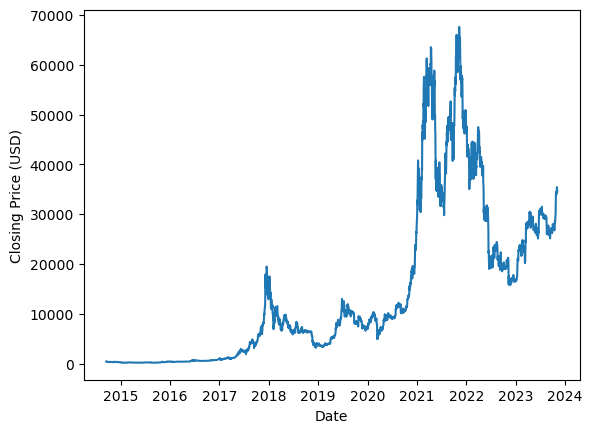

In [10]:
sns.lineplot(x='Date', y='Close', data=BTC)
plt.ylabel('Closing Price (USD)')
plt.xlabel('Date')
plt.show()

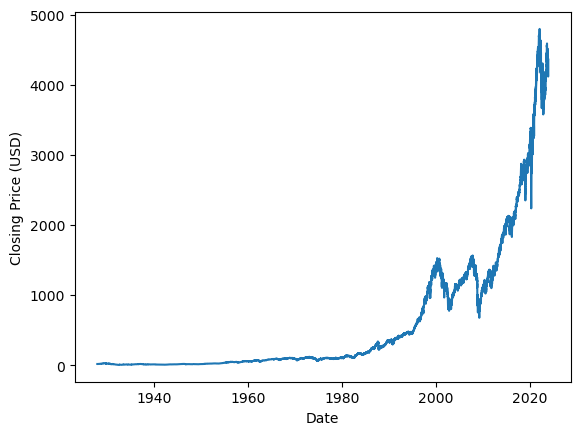

In [11]:
sns.lineplot(x='Date', y='Close', data=SPX)
plt.ylabel('Closing Price (USD)')
plt.xlabel('Date')
plt.show()


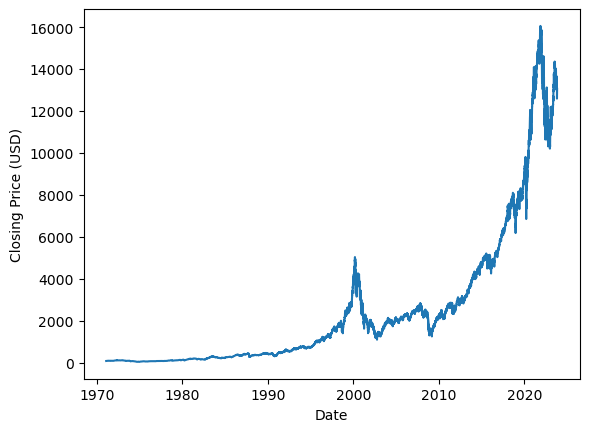

In [12]:
sns.lineplot(x='Date', y='Close', data=NASDAQ)
plt.ylabel('Closing Price (USD)')
plt.xlabel('Date')
plt.show()

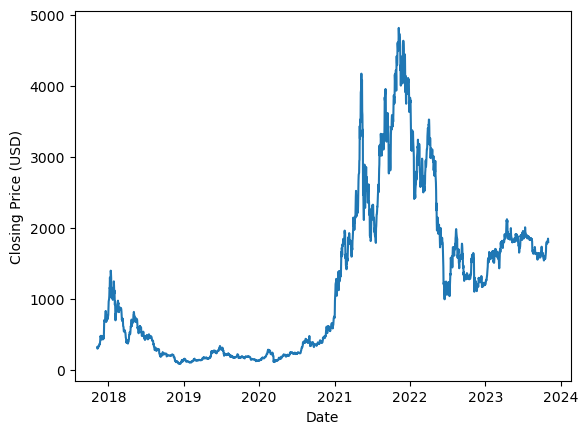

In [13]:
sns.lineplot(x='Date', y='Close', data=ETH)
plt.ylabel('Closing Price (USD)')
plt.xlabel('Date')
plt.show()

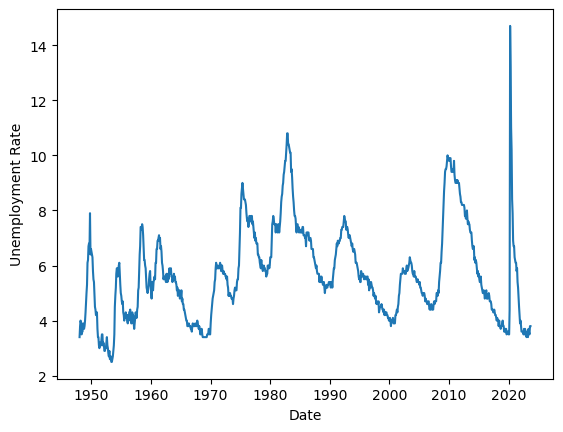

In [14]:
sns.lineplot(x='Date', y='UNRATE', data=unemployment)
plt.ylabel('Unemployment Rate')
plt.xlabel('Date')
plt.show()

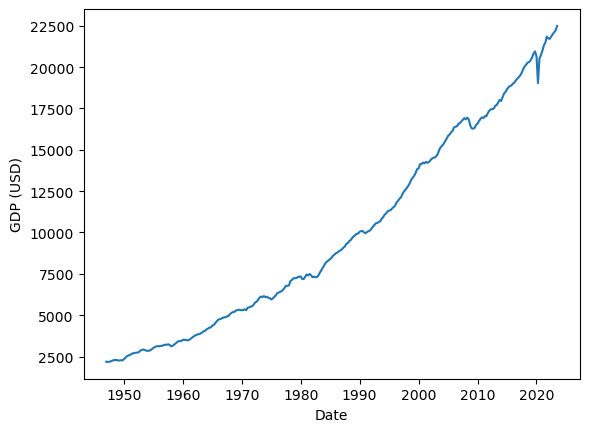

In [15]:
sns.lineplot(x='Date', y='GDPC1', data=GDP)
plt.ylabel('GDP (USD)')
plt.xlabel('Date')
plt.show()

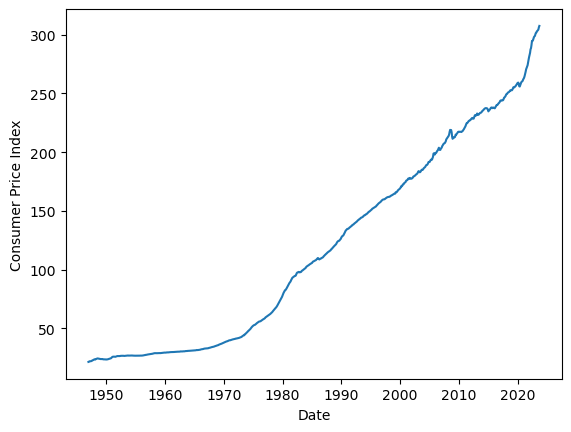

In [16]:
sns.lineplot(x='Date', y='CPIAUCSL', data=CPI)
plt.ylabel('Consumer Price Index')
plt.xlabel('Date')
plt.show()

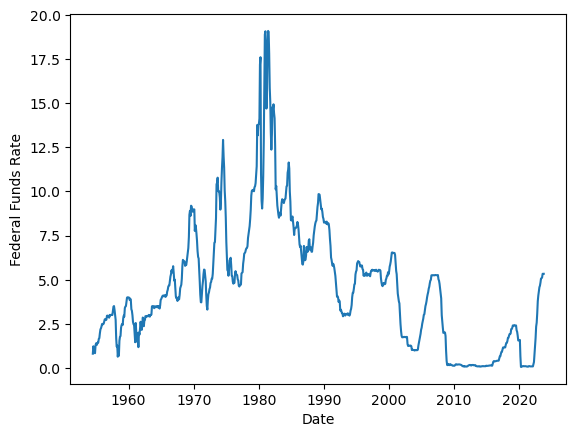

In [17]:
sns.lineplot(x='Date', y='FEDFUNDS', data=FFR)
plt.ylabel('Federal Funds Rate')
plt.xlabel('Date')
plt.show()

In [18]:
GDP.rename(columns={'GDPC1': 'GDP'}, inplace=True)
CPI.rename(columns={'CPIAUCSL': 'CPI'}, inplace=True)
FFR.rename(columns={'FEDFUNDS': 'FFR'}, inplace=True)

# Filter the DataFrames
start_date = pd.to_datetime("2017-11-09")
GDP_filtered = GDP[GDP['Date'] >= start_date]
unemployment_filtered = unemployment[unemployment['Date'] >= start_date]
ETH_filtered = ETH[ETH['Date'] >= start_date]
NASDAQ_filtered = NASDAQ[NASDAQ['Date'] >= start_date]
SPX_filtered = SPX[SPX['Date'] >= start_date]
BTC_filtered = BTC[BTC['Date'] >= start_date]
CPI_filtered = CPI[CPI['Date'] >= start_date]
FFR_filtered = FFR[FFR['Date'] >= start_date]

# base dataframe
# base_df = pd.concat([BTC_filtered['Date'], ETH_filtered['Date'], NASDAQ_filtered['Date'], SPX_filtered['Date']], ignore_index=True).sort_values().reset_index(drop=True)

# dataframe for Covid
covid_data = SPX_filtered[['Date', 'Close']]
covid_data = pd.merge(covid_data, GDP_filtered, on='Date', how='left')
covid_data = pd.merge(covid_data, unemployment_filtered, on='Date', how='left')
covid_data = pd.merge(covid_data, BTC_filtered, on='Date', how='left', suffixes=('', '_BTC'))
covid_data = pd.merge(covid_data, ETH_filtered, on='Date', how='left', suffixes=('', '_ETH'))
covid_data = pd.merge(covid_data, NASDAQ_filtered, on='Date', how='left', suffixes=('', '_NASDAQ'))
# covid_data = pd.merge(covid_data, SPX_filtered, on='Date', how='left', suffixes=('', '_SPX'))

# Merge the CPI and Federal Funds Rate using a left join
covid_data = pd.merge(covid_data, CPI_filtered, on='Date', how='left')
covid_data = pd.merge(covid_data, FFR_filtered, on='Date', how='left')

# Forward fill the CPI and Federal Funds Rate
covid_data['CPI'] = covid_data['CPI'].ffill()
covid_data['CPI'] = covid_data['CPI'].bfill()
covid_data['FFR'] = covid_data['FFR'].ffill()
covid_data['FFR'] = covid_data['FFR'].bfill()
covid_data['GDP'] = covid_data['GDP'].ffill()
covid_data['GDP'] = covid_data['GDP'].bfill()
covid_data['UNRATE'] = covid_data['UNRATE'].ffill()
covid_data['UNRATE'] = covid_data['UNRATE'].bfill()



# Sort and reset index (should already be sorted)
covid_data.reset_index(drop=True, inplace=True)

# print(covid_data.head())
# print(covid_data['GDP'].isna().sum())

     Close_BTC   Close_ETH    Close_SPX  Close_NASDAQ        GDP  UNRATE  \
0  7143.580078  320.884003  2584.620117   6750.049805  20304.874     4.1   
1  6618.140137  299.252991  2582.300049   6750.939941  20304.874     4.1   
2  6559.490234  316.716003  2584.840088   6757.600098  20304.874     4.1   
3  6635.750000  337.631012  2578.870117   6737.870117  20304.874     4.1   
4  7315.540039  333.356995  2564.620117   6706.209961  20304.874     4.1   

       CPI  FFR  
0  247.805  1.3  
1  247.805  1.3  
2  247.805  1.3  
3  247.805  1.3  
4  247.805  1.3  


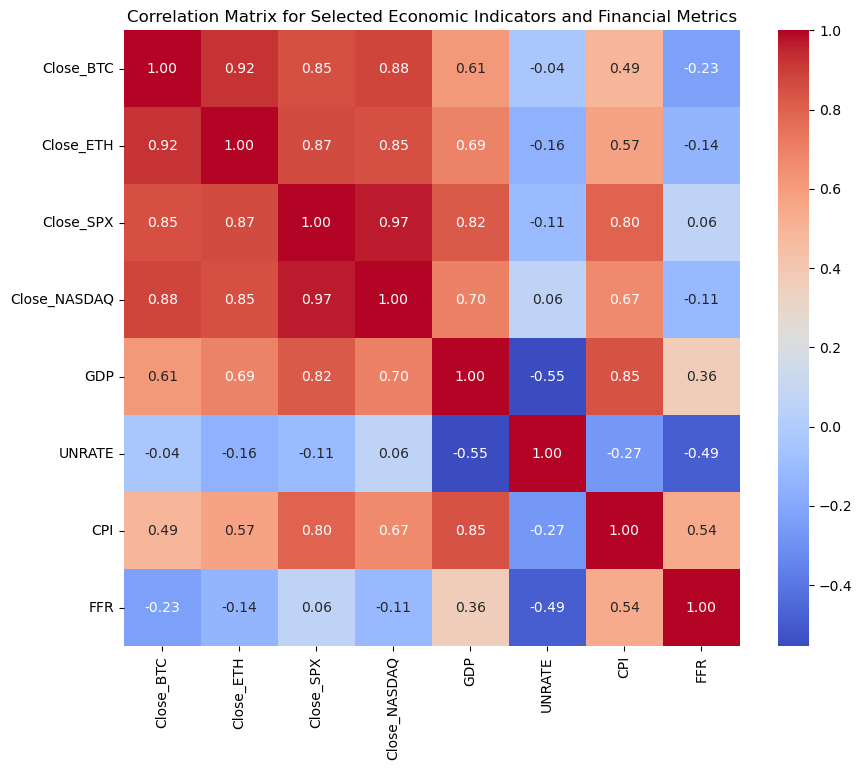

In [19]:
covid_data.rename(columns={'Close': 'Close_SPX'}, inplace=True)
columns_of_interest = ['Close_BTC', 'Close_ETH', 'Close_SPX', 'Close_NASDAQ', 'GDP', 'UNRATE','CPI', 'FFR']
covid_data_interest = covid_data[columns_of_interest].copy()
covid_data_interest.dropna(inplace=True)
print(covid_data_interest.head())
covid_data_interest.to_csv('covid_data.csv', index=False)
correlation_matrix = covid_data_interest.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix for Selected Economic Indicators and Financial Metrics")
plt.show()


c:\Users\jacks\anaconda3\envs\compsci371\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


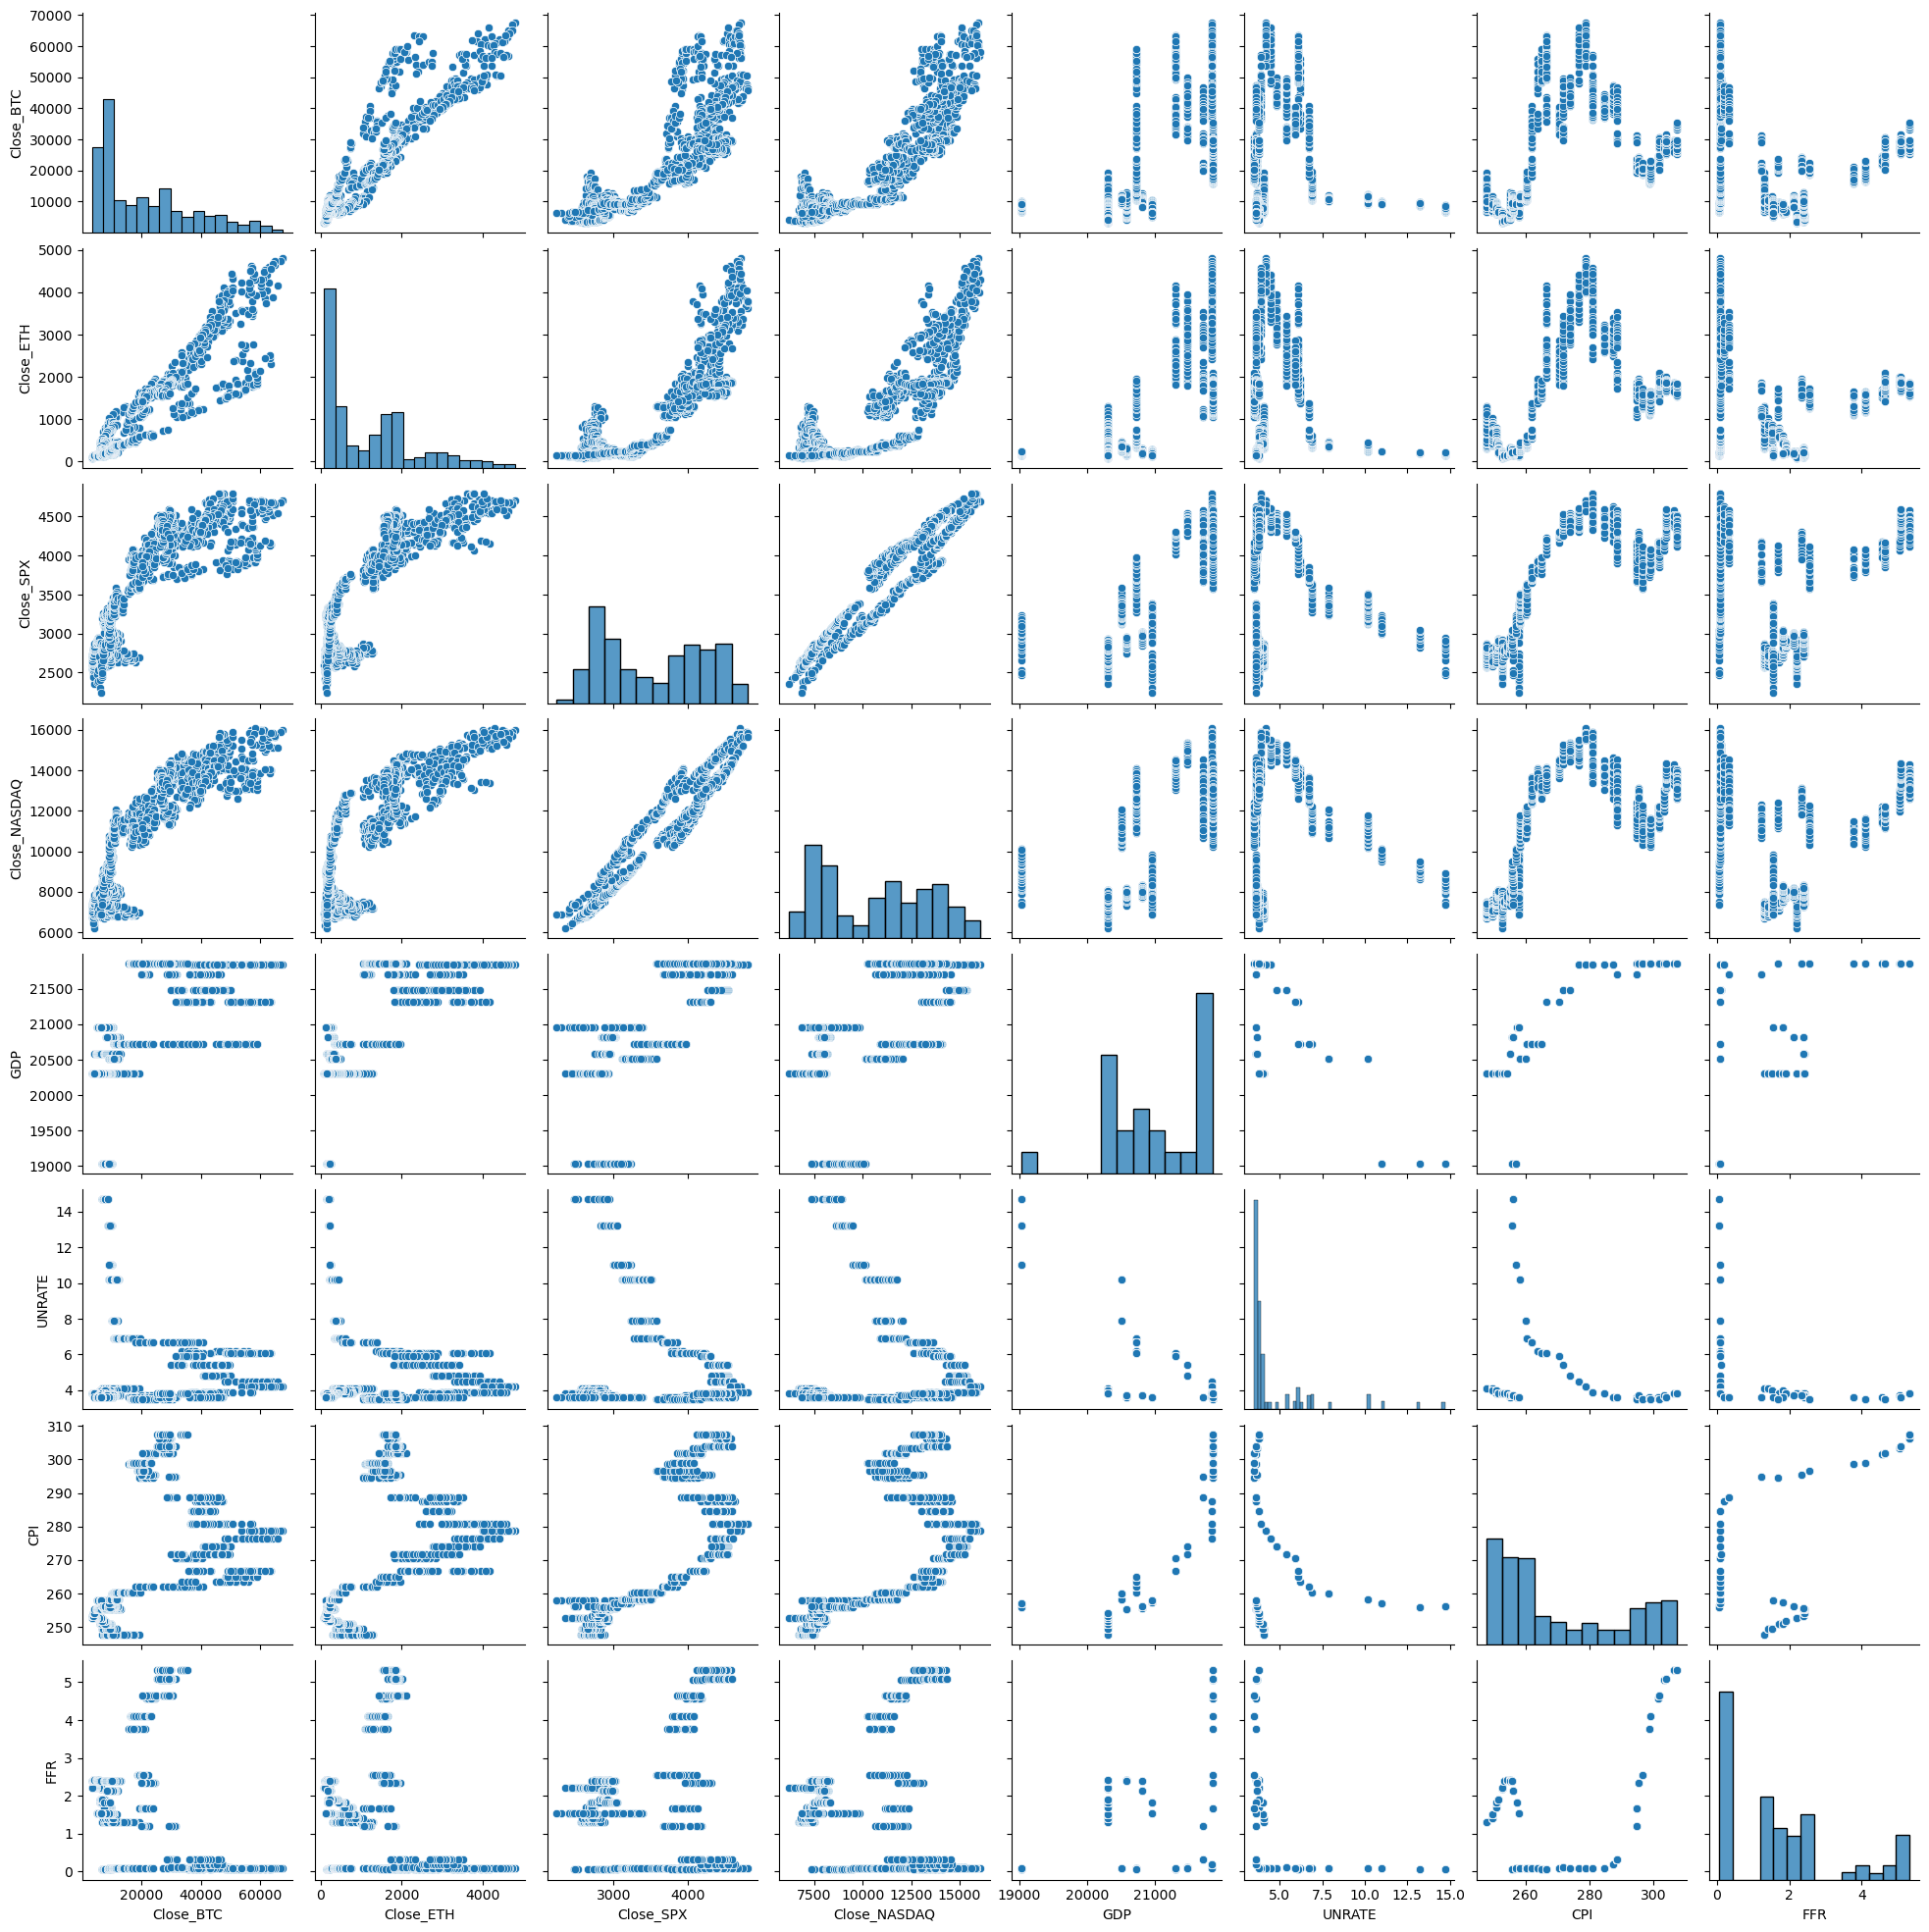

In [20]:
sns.pairplot(covid_data_interest)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Evaluating for Close_SPX:
Mean Squared Error for Close_SPX:  50036.85241473988
Square root of MSE for Close_SPX:  223.68918707604058
R^2 Score for Close_SPX:  0.8937184048393726
Average Price for Close_SPX:  3539.388743787899


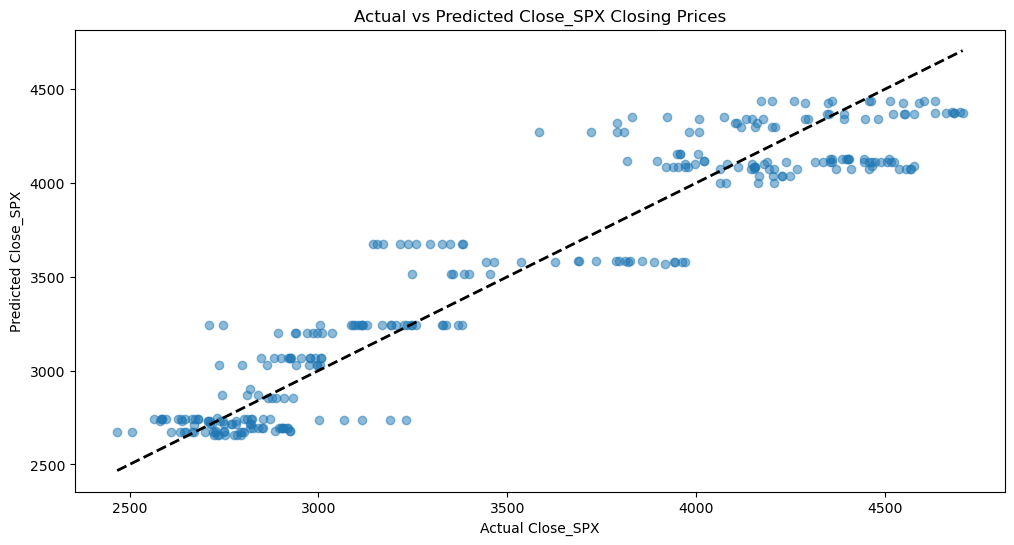


Evaluating for Close_NASDAQ:
Mean Squared Error for Close_NASDAQ:  1254250.3465199256
Square root of MSE for Close_NASDAQ:  1119.9331884179187
R^2 Score for Close_NASDAQ:  0.8376628770267899
Average Price for Close_NASDAQ:  10669.706541372341


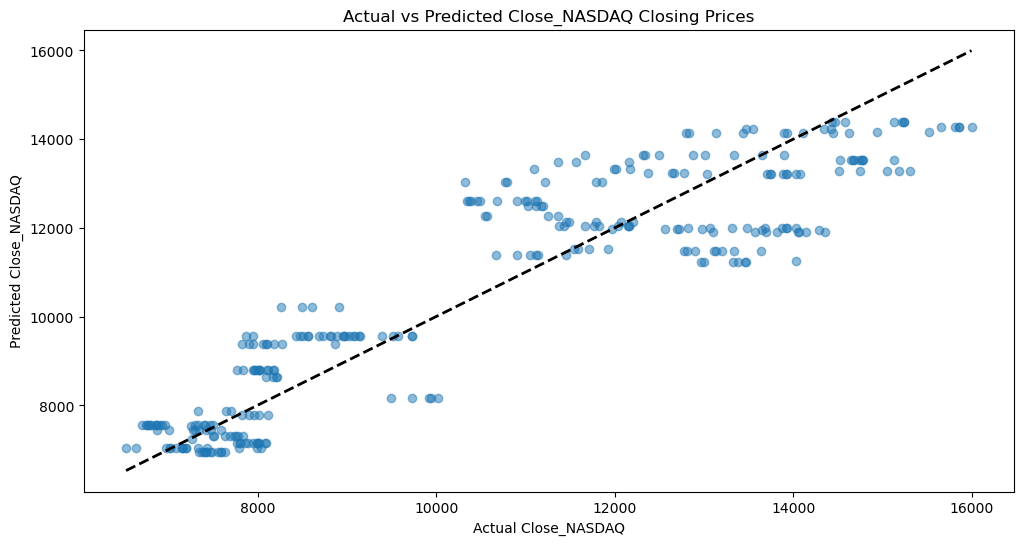


Evaluating for Close_BTC:
Mean Squared Error for Close_BTC:  80713495.97324887
Square root of MSE for Close_BTC:  8984.069009822268
R^2 Score for Close_BTC:  0.6832463448482076
Average Price for Close_BTC:  21079.603350583777


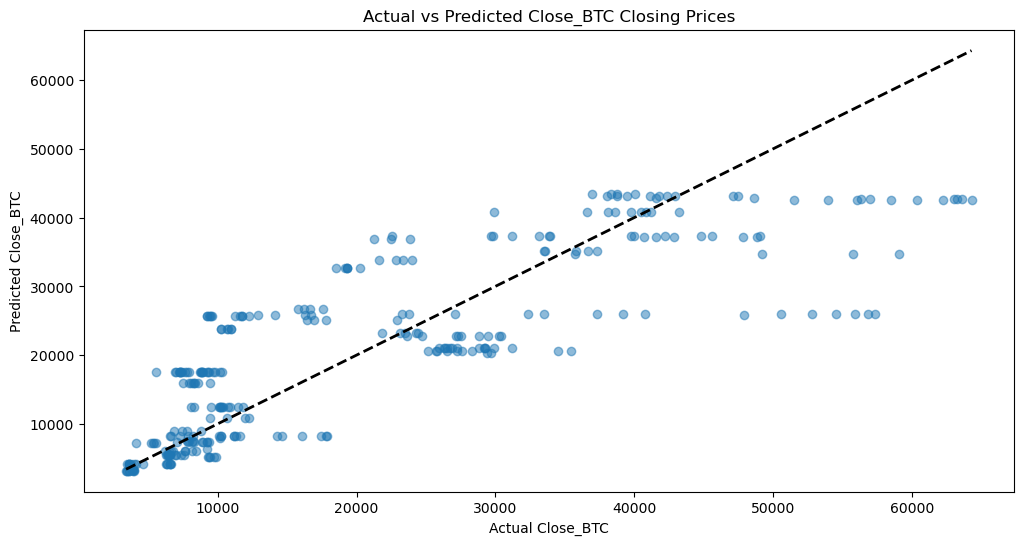


Evaluating for Close_ETH:
Mean Squared Error for Close_ETH:  336207.306604566
Square root of MSE for Close_ETH:  579.8338612090242
R^2 Score for Close_ETH:  0.7382753351947338
Average Price for Close_ETH:  1216.126769175532


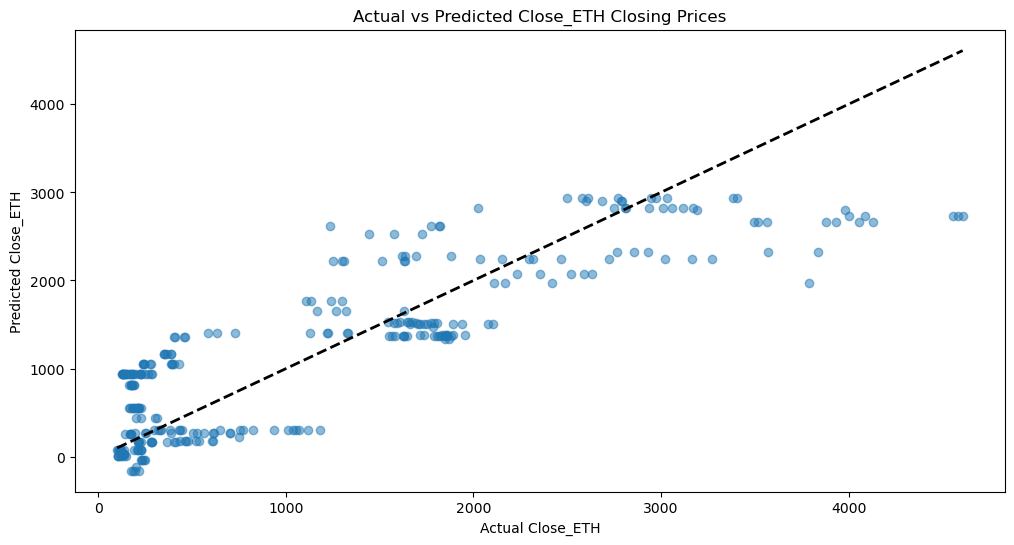

In [22]:
# Columns to iterate over
columns = ['Close_SPX', 'Close_NASDAQ', 'Close_BTC', 'Close_ETH']

# Independent variables
X = covid_data_interest[['GDP', 'UNRATE', 'CPI', 'FFR']]

for column in columns:
    print(f"\nEvaluating for {column}:")

    y = covid_data_interest[column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error for {column}: ', mse)
    print(f'Square root of MSE for {column}: ', mse**0.5)
    print(f'R^2 Score for {column}: ', r2)
    print(f'Average Price for {column}: ', covid_data_interest[column].mean())

    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel(f'Actual {column}')
    plt.ylabel(f'Predicted {column}')
    plt.title(f'Actual vs Predicted {column} Closing Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
    plt.show()

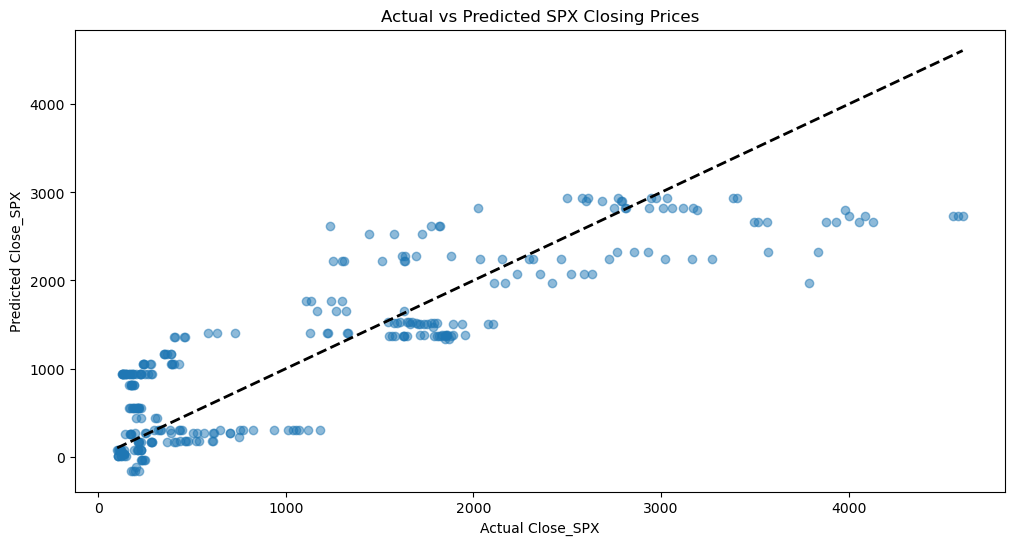

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Close_SPX')
plt.ylabel('Predicted Close_SPX')
plt.title('Actual vs Predicted SPX Closing Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

In [25]:
# Neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 64) # 4 input features
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1) # Predicting a single value

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [26]:
# Training loop
def train_model(model, criterion, optimizer, train_loader, epochs=100, show_output=False):
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)  # Squeeze the outputs
            loss.backward()
            optimizer.step()
        if show_output:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

In [27]:
# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    predictions = []
    actuals = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            predictions.extend(outputs.view(-1).tolist())
            actuals.extend(y_batch.tolist())
    
    mse = mean_squared_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)
    return mse, r2

In [28]:
def prepare_data(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_torch = torch.tensor(X_scaled, dtype=torch.float32)
    y_torch = torch.tensor(y.values, dtype=torch.float32)

    X_train_torch, X_test_torch, y_train_torch, y_test_torch = train_test_split(X_torch, y_torch, test_size=0.2, random_state=0)

    train_dataset = TensorDataset(X_train_torch, y_train_torch)
    test_dataset = TensorDataset(X_test_torch, y_test_torch)

    batch_size = 8
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, test_loader

In [29]:
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.003)

In [30]:
columns = ['Close_SPX', 'Close_NASDAQ', 'Close_BTC', 'Close_ETH']

for column in columns:
    print(f"\nEvaluating for {column}:")

    y = covid_data_interest[column]
    train_loader, test_loader = prepare_data(X, y)

    epochs = 100
    show_output = False
    train_model(net, criterion, optimizer, train_loader, epochs, show_output)

    mse, r2 = evaluate_model(net, test_loader, criterion)

    print(f'Mean Squared Error for {column}: ', mse)
    print(f'Square root of MSE for {column}: ', mse**0.5)
    print(f'R^2 Score for {column}: ', r2)
    print(f'Average Price for {column}: ', covid_data_interest[column].mean())


Evaluating for Close_SPX:
Mean Squared Error for Close_SPX:  19158.326320772154
Square root of MSE for Close_SPX:  138.41360598139244
R^2 Score for Close_SPX:  0.9593064434788159
Average Price for Close_SPX:  3539.388743787899

Evaluating for Close_NASDAQ:
Mean Squared Error for Close_NASDAQ:  250197.014722752
Square root of MSE for Close_NASDAQ:  500.1969759232377
R^2 Score for Close_NASDAQ:  0.9676170999995696
Average Price for Close_NASDAQ:  10669.706541372341

Evaluating for Close_BTC:
Mean Squared Error for Close_BTC:  27851431.926368244
Square root of MSE for Close_BTC:  5277.4455872484605
R^2 Score for Close_BTC:  0.8906992844558044
Average Price for Close_BTC:  21079.603350583777

Evaluating for Close_ETH:
Mean Squared Error for Close_ETH:  67339.26564877717
Square root of MSE for Close_ETH:  259.4981033625818
R^2 Score for Close_ETH:  0.9475789300701801
Average Price for Close_ETH:  1216.126769175532
